# Look at the basics from the slides **first**.

[slide1 link (Properties, insertion, sorting, traversals, min, max, search)](https://docs.google.com/presentation/d/1G_m4XScLxUneFTja37r5C8RHy3AAALlO/edit?slide=id.p1#slide=id.p1)

[slide2 link (Balancing, Successor, Predecessor, Deletion)](https://docs.google.com/presentation/d/1wPMXTHj0vU3NJd6Ryggo1kzB4PdOjuCe/edit?slide=id.p2#slide=id.p2)


# Insertion & traversals

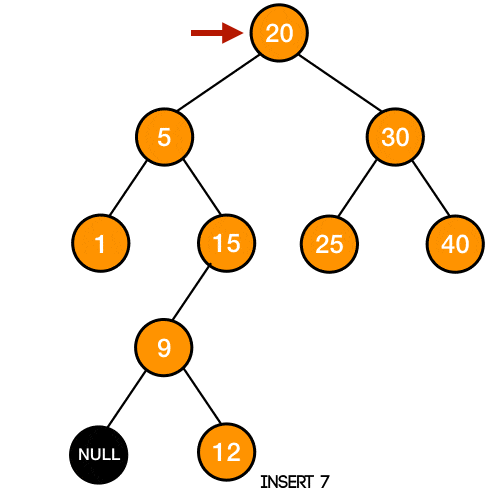

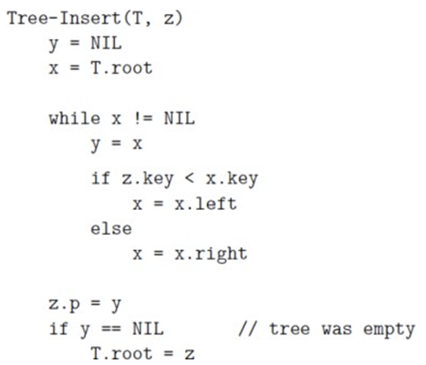

- y is parent of node we currently inspect
- While loop descends through tree moving into correct subtree at each step ( **Finding the parent** )
- Last part links node and parent


In [2]:
class TNode:
    def __init__(self, val, left=None, right=None):
        self.parent = None
        self.val = val
        self.left = left
        self.right = right

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx
def insert(root, key):
    new_node = TNode(key) #z

    # Find the parent node to attach the new node
    parent = None  # Tracks the parent node y
    current = root  # Start from the root x

    while current is not None: # finding parent
        parent = current
        if key < current.val:  # Go left
            current = current.left
        elif key > current.val:  # Go right
            current = current.right

    # Set the parent of the new node
    new_node.parent = parent

    # Attach the new node to the left or right of the parent
    if parent is None:  # If tree is empty, make new_node the root
        root = new_node
    elif key < parent.val:  # Attach new_node to the left of the parent
        parent.left = new_node
    else:  # Attach new_node to the right of the parent
        parent.right = new_node

    return root

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx
# In-order Traversal (Left, Root, Right)
def inorder_traversal(root):
    """Left → Root → Right"""
    if root is None:
        return None
    #if root is not None:
    inorder_traversal(root.left)
    print(root.val, end=" ")
    inorder_traversal(root.right)


# Pre-order Traversal (Root, Left, Right)
def preorder_traversal(root):
    """Root → Left → Right"""
    if root is None:
        return None

    print(root.val, end=" ")
    preorder_traversal(root.left)
    preorder_traversal(root.right)


# Post-order Traversal (Left, Right, Root)
def postorder_traversal(root):
    """Left → Right → Root"""
    if root is None:
        return None

    postorder_traversal(root.left)
    postorder_traversal(root.right)
    print(root.val, end=" ")

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx
root = None  # Start with an empty BST
values_to_insert = [20, 10, 30, 5, 15, 25, 35]
"""
      20
    /    \
  10      30
 /  \    /  \
5   15  25  35

"""
# Insert each value into the BST
for value in values_to_insert:
    root = insert(root, value)

# Perform Traversals
print("In-order Traversal:")
inorder_traversal(root)  # Expected: 5 10 15 20 25 30 35
print("\nPre-order Traversal:")
preorder_traversal(root)  # Expected: 20 10 5 15 30 25 35
print("\nPost-order Traversal:")
postorder_traversal(root)  # Expected: 5 15 10 25 35 30 20

In-order Traversal:
5 10 15 20 25 30 35 
Pre-order Traversal:
20 10 5 15 30 25 35 
Post-order Traversal:
5 15 10 25 35 30 20 

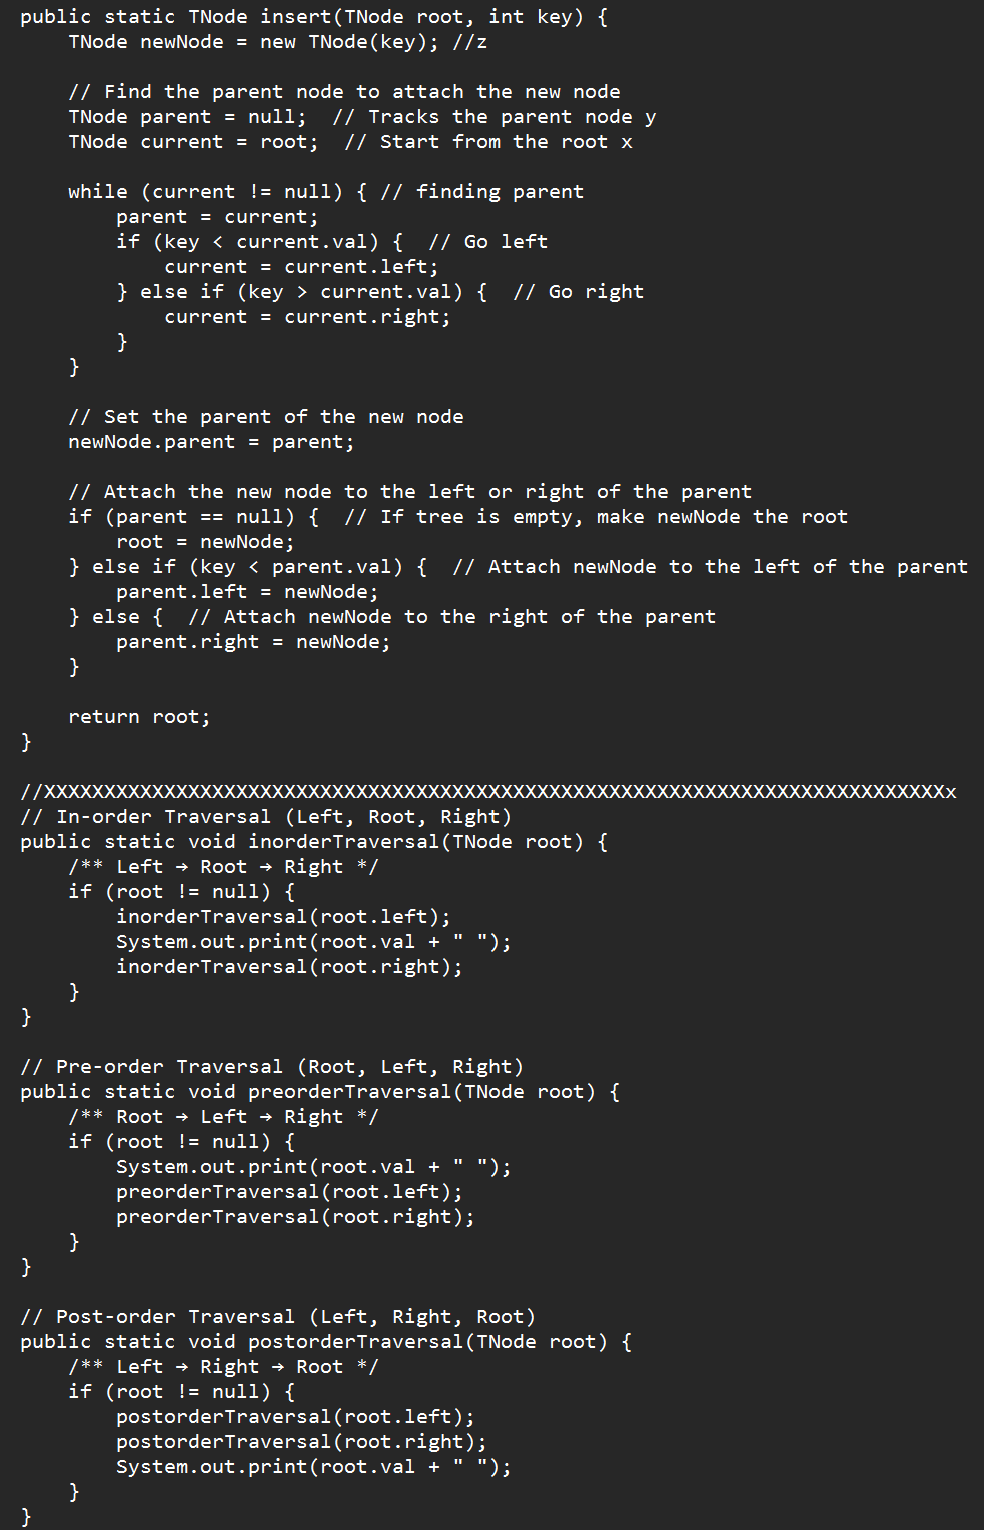

# Get the minimum value

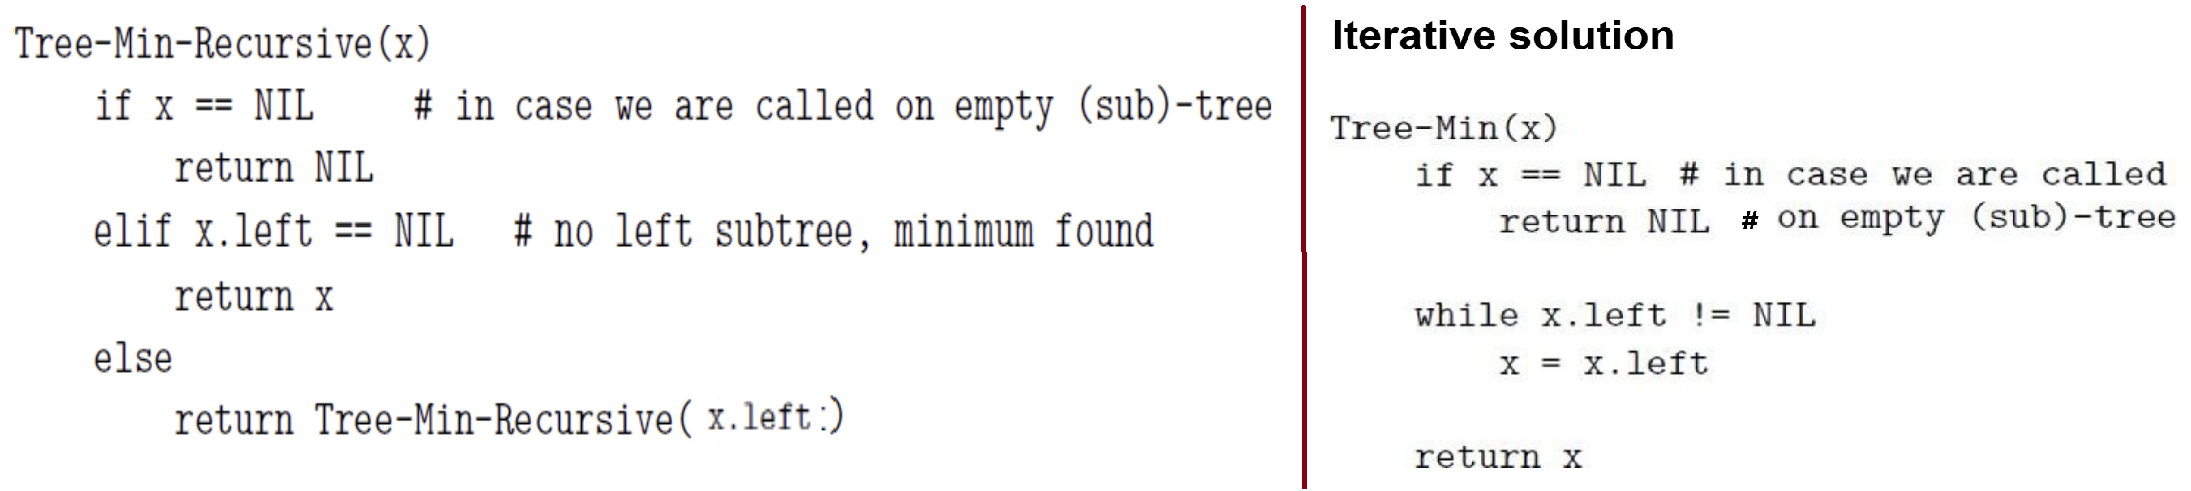

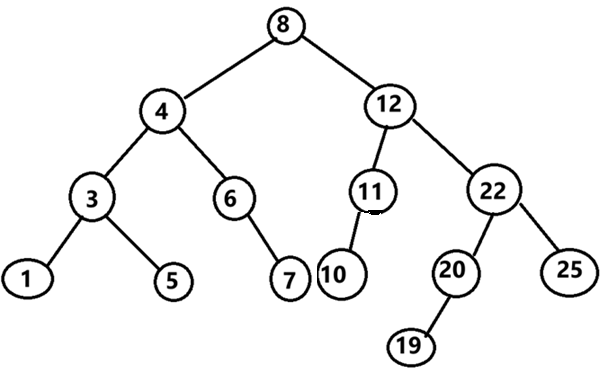

- This algorithm is an example of **tail recursion**.
- Since **each function call** comes with an **overhead** (uses stack--memory extra),
   - it is often more efficient to eliminate tail recursion and **replace it by a loop.**


In [3]:
def get_min_recursive(x):
    # two Base cases
    if x == None:# in case called on a empty tree
        return None

    if x.left == None:# no left subtree, minimum found
        return x

    # Recursive case
    return get_min_recursive(x.left) # recursive call

def get_min(x):

    # loop down to find the leftmost leaf
    while(x.left is not None):
        x = x.left

    return x

# DRIVER PART
root = None  # Start with an empty BST
values_to_insert = [20, 10, 30, 5, 15, 25, 35]
"""
      20
    /    \
  10      30
 /  \    /  \
5   15  25  35

"""
# Insert each value into the BST
for value in values_to_insert:
    root = insert(root, value)

print(get_min(root).val)
print(get_min_recursive(root).val)
print('-'*50)
#####################################################

"""
            50
           /
        40
       /
     30
    /
  20
 /
10
"""
root = None  # Start with an empty BST
values_to_insert = [50, 40, 30, 20, 10]
# Insert each value into the BST
for value in values_to_insert:
    root = insert(root, value)

print(get_min(root).val)
print(get_min_recursive(root).val)
print('-'*50)
#########################################
"""
10
  \
  20
    \
    30
      \
      40
        \
        50

"""
root = None  # Start with an empty BST
values_to_insert = [10, 20, 30, 40, 50]
# Insert each value into the BST
for value in values_to_insert:
    root = insert(root, value)

print(get_min(root).val)
print(get_min_recursive(root).val)
print('-'*50)

5
5
--------------------------------------------------
10
10
--------------------------------------------------
10
10
--------------------------------------------------


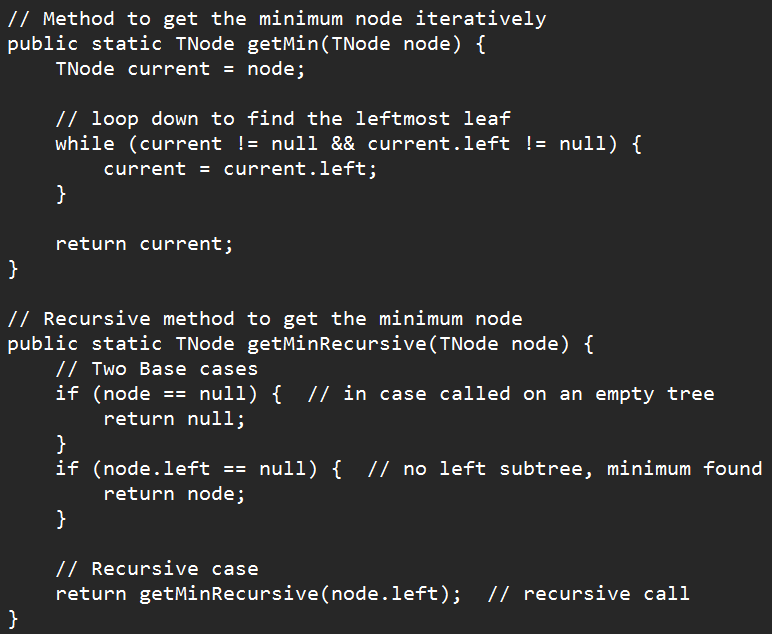

# Get the maximum value

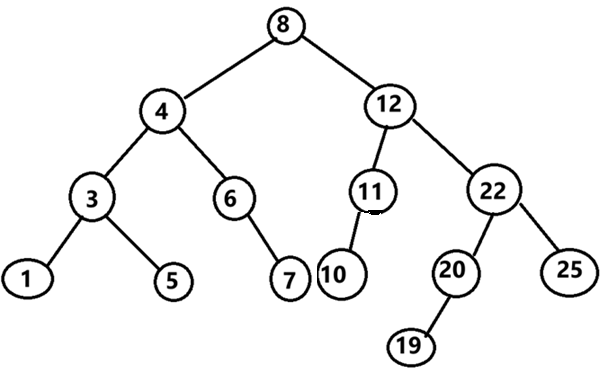

In [4]:
def get_max(current_node):
    # loop down to find the rightmost leaf
    while(current_node.right is not None):
        current_node = current_node.right

    return current_node

def get_max_recursive(x):
    if x == None:# in case called on a empty tree
        return None
    if x.right == None:# no right subtree, maximum found
        return x

    return get_max_recursive(x.right)# recursive call


# DRIVER PART
root = None  # Start with an empty BST
values_to_insert = [20, 10, 30, 5, 15, 25, 35]
"""
      20
    /    \
  10      30
 /  \    /  \
5   15  25  35

"""
# Insert each value into the BST
for value in values_to_insert:
    root = insert(root, value)

print(get_max(root).val)
print(get_max_recursive(root).val)
print('-'*50)
#####################################################

"""
            50
           /
        40
       /
     30
    /
  20
 /
10
"""
root = None  # Start with an empty BST
values_to_insert = [50, 40, 30, 20, 10]
# Insert each value into the BST
for value in values_to_insert:
    root = insert(root, value)

print(get_max(root).val)
print(get_max_recursive(root).val)
print('-'*50)
#########################################
"""
10
  \
  20
    \
    30
      \
      40
        \
        50

"""
root = None  # Start with an empty BST
values_to_insert = [10, 20, 30, 40, 50]
# Insert each value into the BST
for value in values_to_insert:
    root = insert(root, value)

print(get_max(root).val)
print(get_max_recursive(root).val)
print('-'*50)

35
35
--------------------------------------------------
50
50
--------------------------------------------------
50
50
--------------------------------------------------


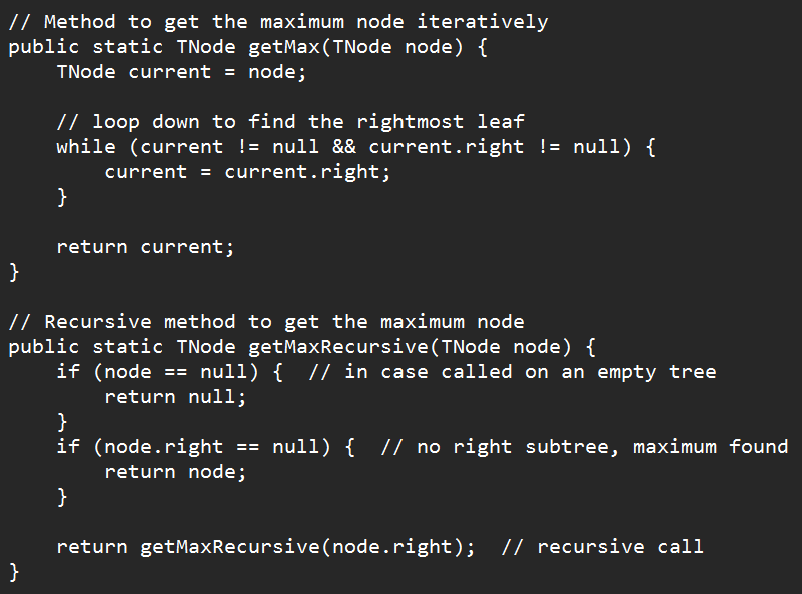

# Searching in BST

![SegmentLocal](https://www.mathwarehouse.com/programming/images/binary-search-tree/binary-search-tree-sorted-array-animation.gif "segment")

- In array structure, it would have needed **11 comparisons**
- But for BST struture, it needed **4 comparisons** (Better)

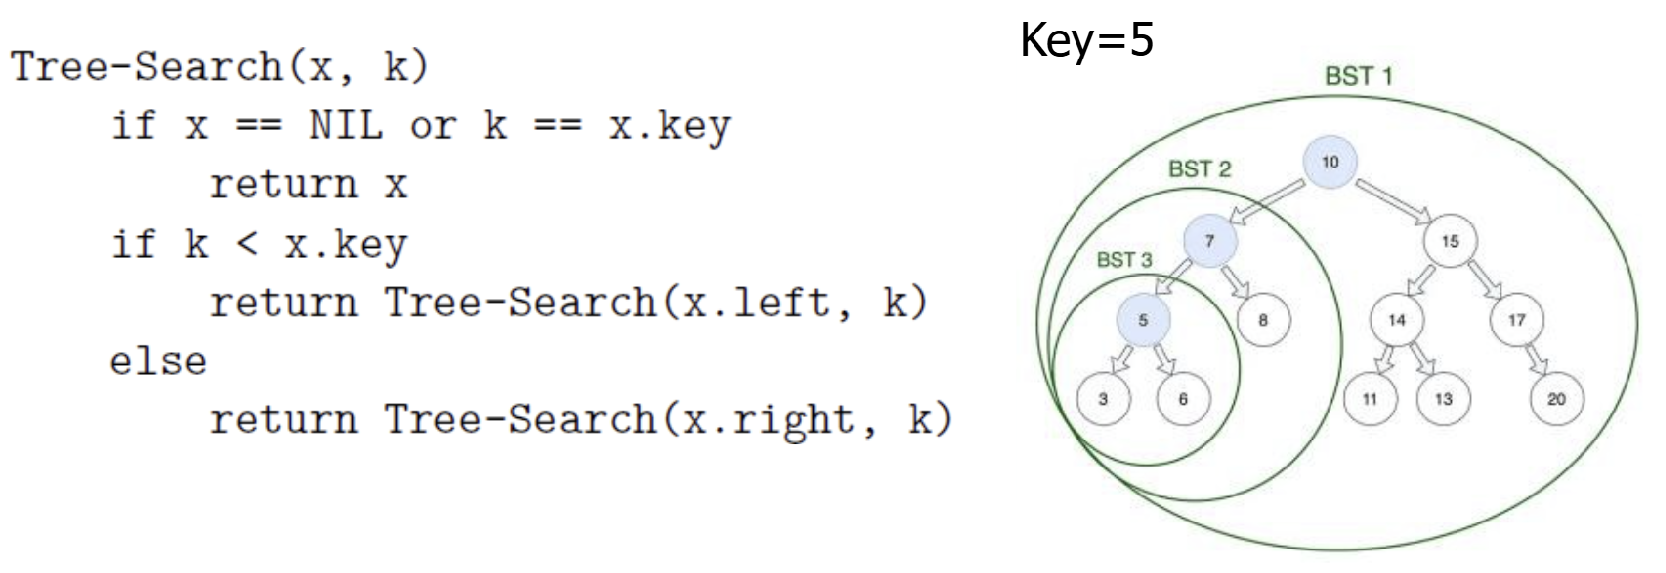

In [5]:
def search_BST(root, key):
    if root== None or root.val == key:
        return root
    elif key < root.val:
        return search_BST(root.left, key)
    else:
        return search_BST(root.right, key)

###########################################################
root = None  # Start with an empty BST
values_to_insert = [21, 14, 28, 11, 18, 25, 32, 5, 12, 15, 19,  23, 27, 30, 37]
#                   0    1   2   3   4   5   6  7   8   9  10   11  12  13  14
# Insert each value into the BST
for value in values_to_insert:
    root = insert(root, value)


result = search_BST(root, 27)
if result==None:
    print("Not Found")
else:
    print("Found\nNode Description:",result.__dict__)
    print("result", "val:", result.val, ", parent:", result.parent.val)

print('-'*50)
###################################################################
result = search_BST(root, 270)
if result==None:
    print("Not Found")
else:
    print("Found\nNode Description:",result.__dict__)
    print("result", "val:", result.val, ", parent:", result.parent.val)

print('-'*50)
###################################################################

result = search_BST(root, 18)
if result==None:
    print("Not Found")
else:
    print("Found\nNode Description:",result.__dict__)
    print("result", "val:", result.val, ", parent:", result.parent.val,
          ", left:", result.left.val, ", right:", result.right.val)

print('-'*50)

Found
Node Description: {'parent': <__main__.TNode object at 0x7927300123d0>, 'val': 27, 'left': None, 'right': None}
result val: 27 , parent: 25
--------------------------------------------------
Not Found
--------------------------------------------------
Found
Node Description: {'parent': <__main__.TNode object at 0x792730012190>, 'val': 18, 'left': <__main__.TNode object at 0x7927300124d0>, 'right': <__main__.TNode object at 0x792730012510>}
result val: 18 , parent: 14 , left: 15 , right: 19
--------------------------------------------------


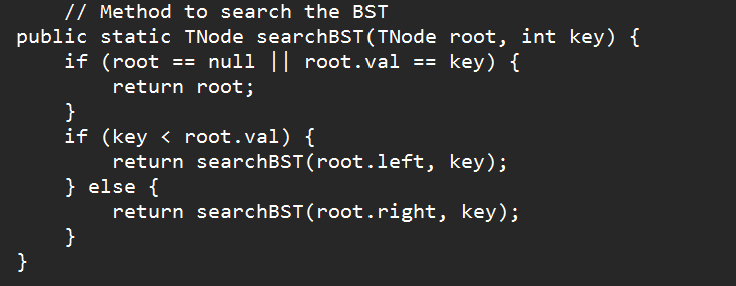

# Balanced vs Unbalanced BST  

- If the height difference between the left and right subtrees of any node in the BST is more than one, it is considered **unbalanced**. Otherwise, it is **balanced**.  
   - In a **balanced BST**, searching operations have a time complexity of **O(log(n))**.  
   - In an **unbalanced BST** (when it starts to become **skewed**), searching may take up to **O(n)**, rendering the BST inefficient.  


### Maintaining Efficiency in BSTs (Importance of Balanced BST  )
- Always work with **balanced BSTs** to ensure optimal performance.  
- After any operation (**insert** or **delete**), check if the BST has become **unbalanced**.  
- If unbalanced, **rebalance** the BST to restore efficiency.




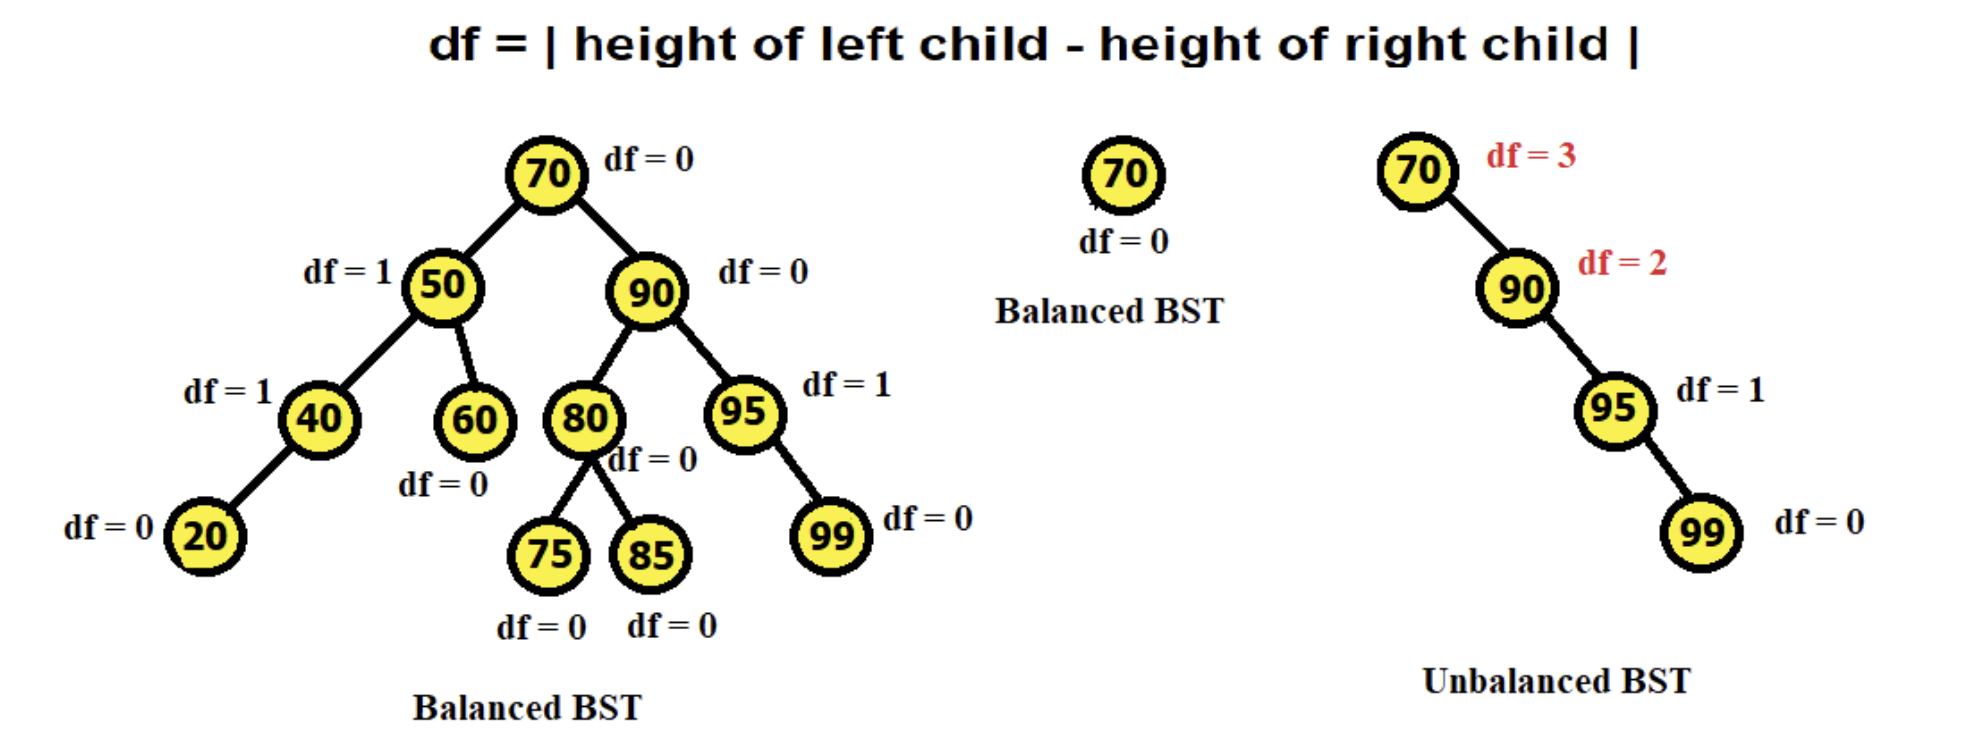

## Converting an Unbalanced BST into a Balanced BST  

### Balanced BST Construction from a Sorted Array

#### Step 1: Traverse and Store Data
- Perform **inorder traversal** → store BST elements in an ascending array.

#### Step 2: Reconstruct the BST (using index bounds)
- Compute `mid = (left + right) // 2`.
- Create the root from `arr[mid]`.
- Left subtree uses indices `[left, mid - 1]`.
- Right subtree uses indices `[mid + 1, right]`.

#### Step 3: Recursive Subtree Construction
- **Base case:** if `left > right`, return `None`.
- **Recursively build**:
  - `root.left = sortedArrayToBSTRecur(arr, left, mid - 1)`
  - `root.right = sortedArrayToBSTRecur(arr, mid + 1, right)`
- Repeat until all ranges are exhausted.


**This process ensures the BST becomes balanced with optimal height.**

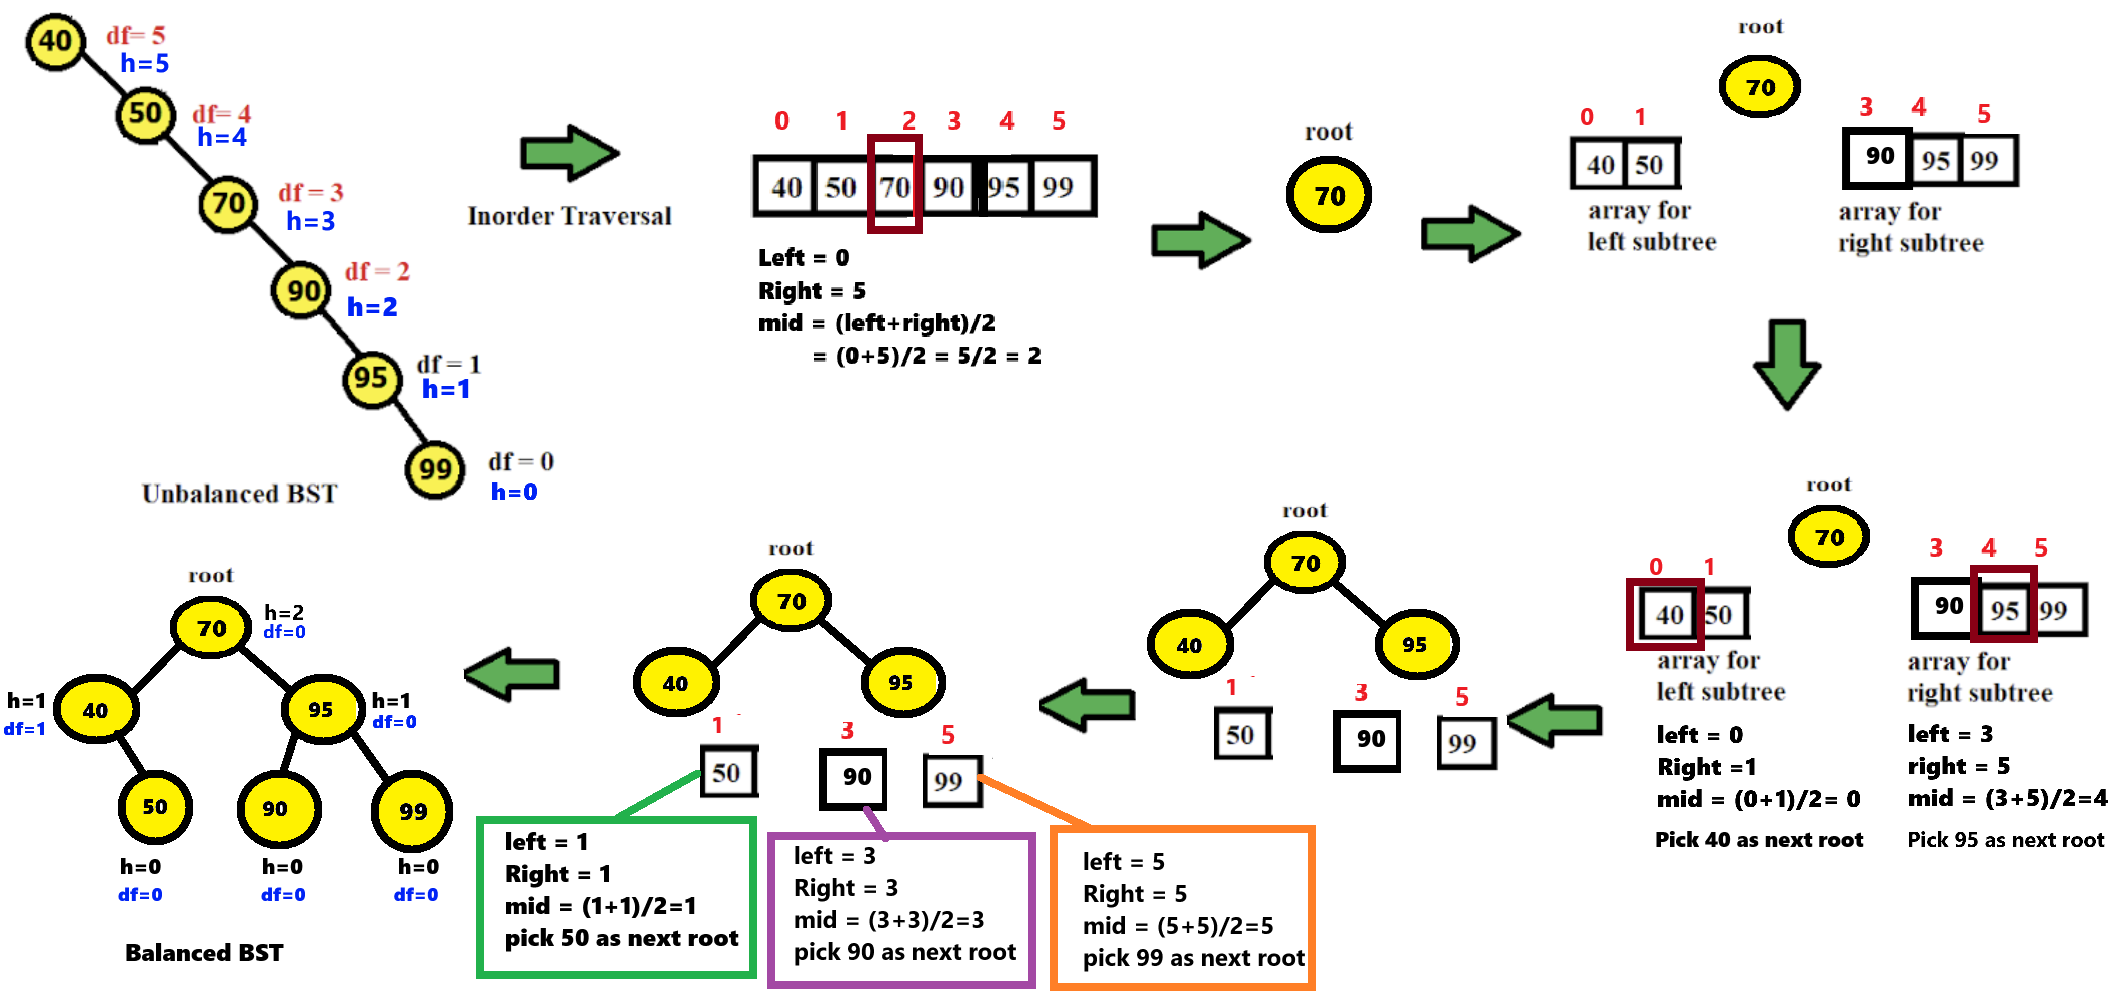

## Sorted Array to Binary Search Tree (Part of balancing BST)

![SegmentLocal](https://www.mathwarehouse.com/programming/images/binary-search-tree/optimal-binary-search-tree-from-sorted-array.gif "segment")

In [6]:
def sortedArrayToBSTRecur(arr, left, right):
    if left > right: # Base case
        return None

    # Find the middle element
    mid = (right+left) // 2

    # Create root node
    root = TNode(arr[mid])

    # Skipping the root node from both left tree and right tree
    #by mid-1 from left tree, and mid+1 from right tree

    # Create left subtree
    root.left = sortedArrayToBSTRecur(arr, left, mid - 1)

    # Create right subtree
    root.right = sortedArrayToBSTRecur(arr, mid + 1, right)

    return root


# In-order Traversal (Left, Root, Right)
def inorder_traversal(root):
    """Left → Root → Right"""
    if root is not None:
        inorder_traversal(root.left)
        print(root.val, end=" ")
        inorder_traversal(root.right)


arr= [40, 50, 70, 90, 95, 99]
root = sortedArrayToBSTRecur(arr, left = 0, right = len(arr) - 1)
inorder_traversal(root)

40 50 70 90 95 99 

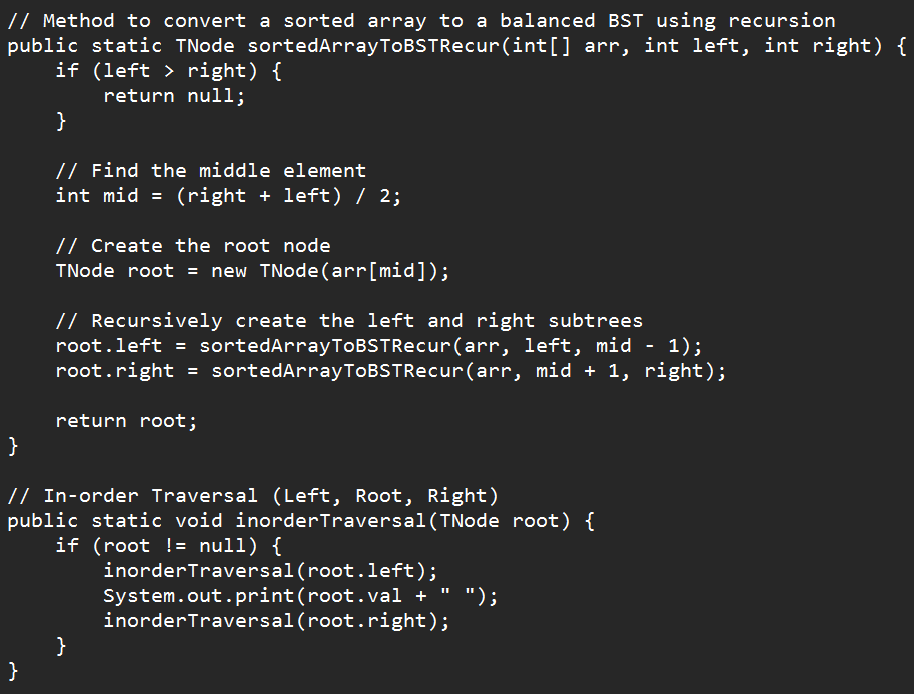

# Find successor

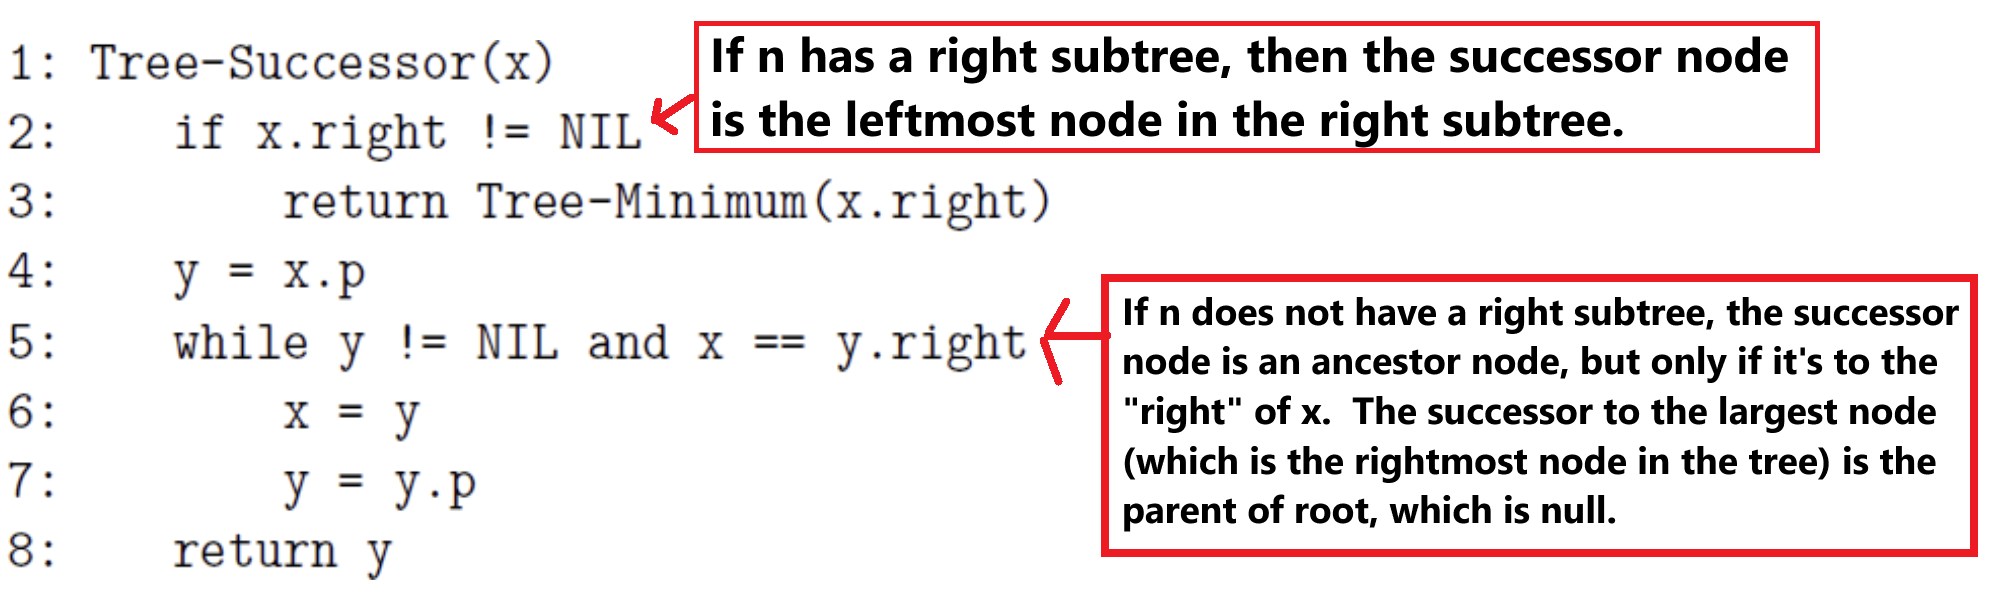

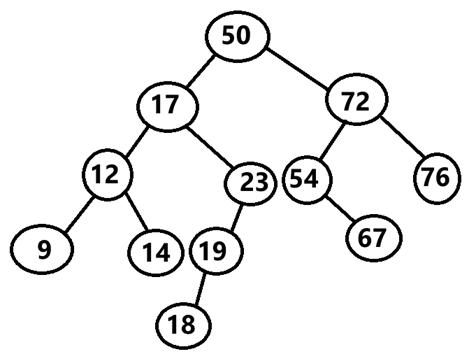

### Directly matching the pseudo code of CLRS book

In [7]:
def arr_to_tree(arr, i=1, parent=None):
    """
    Create a tree from an array representation.

    Args:
        arr (list): The array representing the tree.
        i (int): The current index in the array.
        parent (TNode): The parent node of the current node.

    Returns:
        TNode: The root of the subtree created from the array.
    """
    # Base Case: Check if index is out of bounds or the current element is None
    if i >= len(arr) or arr[i] is None:
        return None

    # Recursive Case:
    # 1. Create a node for the current index, set its parent
    root = TNode(arr[i])
    root.parent = parent

    # 2. Set the left child by recursively calling for index 2 * i
    root.left = arr_to_tree(arr, 2 * i, root)

    # 3. Set the right child by recursively calling for index 2 * i + 1
    root.right = arr_to_tree(arr, 2 * i + 1, root)

    return root


def inOrder_successor(root, x):
    """
    Find the in-order successor of a given node in a binary tree.
    """
    # here, y is the successor and x is the current node

    # Case 1 - Right Subtree of x Exists
    if x.right != None:
        # Successor is the leftmost node of the right subtree
        return get_min(x.right)

    # Case 2 - Right Subtree of x Doesn't Exist
    # Move up the tree as the node is a left child
    y = x.parent
    while y is not None and x == y.right:
        x = y
        y = y.parent

    return y ## Case3--if x is parents's left child,
              #then parent is the succesor

##################################################################
# Manually creating the tree
root = TNode(50)
root.left = TNode(17)
root.right = TNode(72)

root.left.parent = root
root.right.parent = root

root.left.left = TNode(12)
root.left.right = TNode(23)
root.right.left = TNode(54)
root.right.right = TNode(76)

root.left.left.parent = root.left
root.left.right.parent = root.left
root.right.left.parent = root.right
root.right.right.parent = root.right

root.left.left.left = TNode(9)
root.left.left.right = TNode(14)
root.left.right.left = TNode(19)

root.left.left.left.parent = root.left.left
root.left.left.right.parent = root.left.left
root.left.right.left.parent = root.left.right


root.left.right.left.left = TNode(18)
root.left.right.left.left.parent = root.left.right.left

root.right.left.right = TNode(67)
root.right.left.right.parent = root.right.left


# Performing in-order traversal
print("Inorder Traversal (Manually Created Tree)   : ", end='')
inorder_traversal(root)
print()


## Creating tree using recursive code
tree_arr = [None, 50, 17, 72, 12, 23, 54, 76, 9, 14, 19, None, None, 67, None, None, None, None, None, None, 18, None]
#             0    1   2   3   4   5   6   7  8   9  10   11   12    13   14    15    16    17   18     19
root2 = arr_to_tree(tree_arr)
print("Inorder Traversal (using recursive function): ",end='')
inorder_traversal(root2)
print()


#################################################################################

print("Inorder successor of 17 is", inOrder_successor(root, root.left).val)
print("Inorder successor of 23 is", inOrder_successor(root, root.left.right).val)
print("Inorder successor of 19 is", inOrder_successor(root, root.left.right.left).val)
successor = inOrder_successor(root, root.right.right)
if successor:
    print("Inorder successor of 76 is", successor.val)
else:
    print("Inorder successor of 76 is None")
print('-'*50)


#################################################################################

print("Inorder successor of 17 is", inOrder_successor(root2, root.left).val)
print("Inorder successor of 23 is", inOrder_successor(root, root.left.right).val)
print("Inorder successor of 19 is", inOrder_successor(root, root.left.right.left).val)
successor = inOrder_successor(root2, root.right.right)
if successor:
    print("Inorder successor of 76 is", successor.val)
else:
    print("Inorder successor of 76 is None")

Inorder Traversal (Manually Created Tree)   : 9 12 14 17 18 19 23 50 54 67 72 76 
Inorder Traversal (using recursive function): 9 12 14 17 18 19 23 50 54 67 72 76 
Inorder successor of 17 is 18
Inorder successor of 23 is 50
Inorder successor of 19 is 23
Inorder successor of 76 is None
--------------------------------------------------
Inorder successor of 17 is 18
Inorder successor of 23 is 50
Inorder successor of 19 is 23
Inorder successor of 76 is None


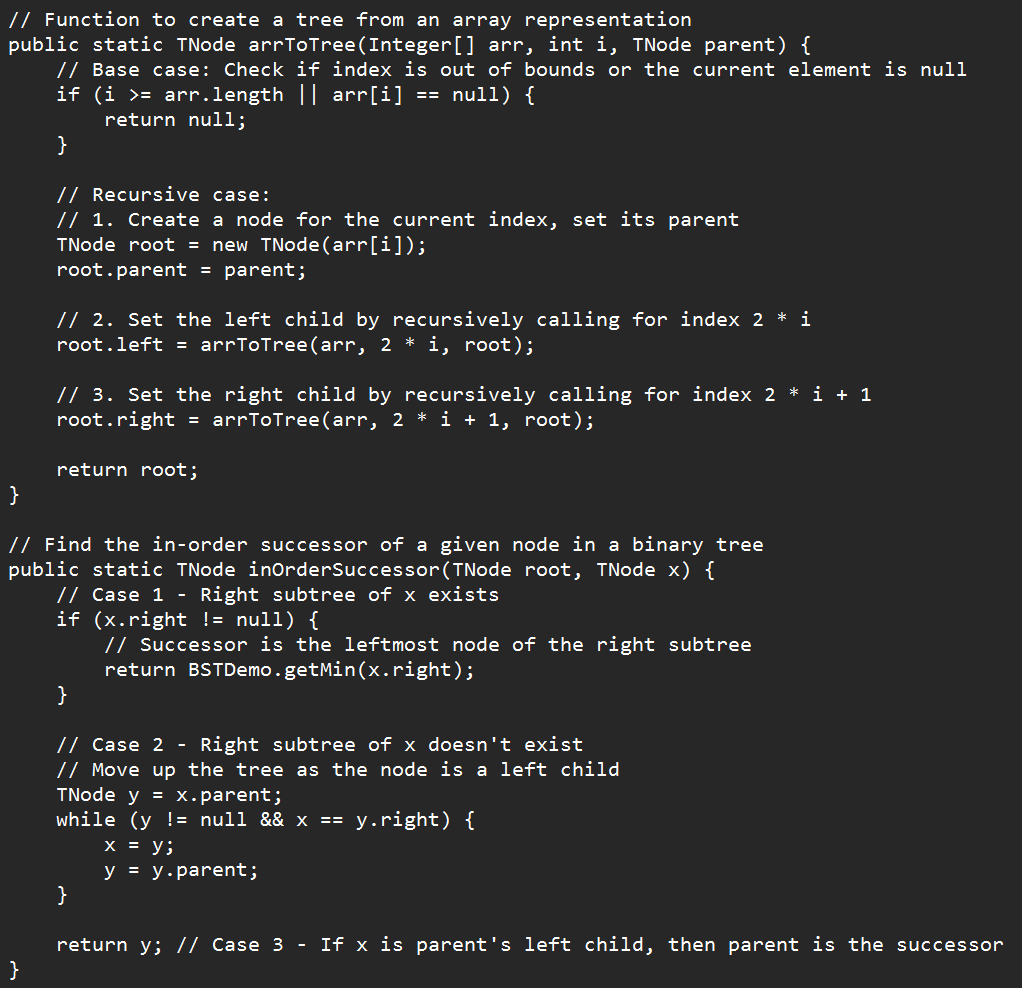

## Explanation of the outputs

find successor(17): [Case01]
- right sub-tree exists
- get the left most node (min value) of the right subtree
- ans:18

find successor(23): [Case02]
- right sub-tree does not exist
- right child--Then, start going to the parent as long as it's the left child of its parents or y becomes Null.
- Here, x = current node, y=successor
   - Step01:  x(current)=23, y(successor)=17
   - Step02:  x(current)=17, y(successor)=50 (end of loop: left brancing ends--loop exits)
- ans:50

find successor(19): [Case03]
- right sub-tree does not exist
- left child of parent--Then, the successor is the parent which is 23
- ans:23


find successor(76): [Case02]
- right sub-tree does not exist
- right child--Then, start going to the parent as long as it's the left child of its parents or y becomes Null.
- Here, x = current node, y=succesor
   - Step01:  x(current)=76, y(successor)=72
   - Step02:  x(current)=72, y(successor)=50
   - Step03:  x(current)=50, y(successor)=None (y==None, loop will end)
- ans:None

# Find predecessor

In [8]:
def inOrder_predecessor(root, x):
    """
    Find the in-order predecessor of a given node in a binary tree.
    """
    # here, y is the predecessor and x is the current node

    # Case 1 - Left Subtree of x Exists
    if x.left != None:
        # predecessor is the right most node of the left subtree
        return get_max(x.left)

    # Case 2 - Left Subtree of x Doesn't Exist
    # Move up the tree as long as the node is a left child
    y = x.parent
    while y is not None and x == y.left:
        x = y
        y = y.parent

    return y ## Case3--if x is parents's right child,
             ## then parent is the predecessor

##################################################################
# Manually creating the tree
root = TNode(50)
root.left = TNode(17)
root.right = TNode(72)

root.left.parent = root
root.right.parent = root

root.left.left = TNode(12)
root.left.right = TNode(23)
root.right.left = TNode(54)
root.right.right = TNode(76)

root.left.left.parent = root.left
root.left.right.parent = root.left
root.right.left.parent = root.right
root.right.right.parent = root.right

root.left.left.left = TNode(9)
root.left.left.right = TNode(14)
root.left.right.left = TNode(19)

root.left.left.left.parent = root.left.left
root.left.left.right.parent = root.left.left
root.left.right.left.parent = root.left.right

# Adding the missing nodes
root.left.right.left.left = TNode(18)
root.left.right.left.left.parent = root.left.right.left

root.right.left.right = TNode(67)
root.right.left.right.parent = root.right.left


# Performing in-order traversal
print("Inorder Traversal (Manually Created Tree)   : ", end='')
inorder_traversal(root)
print()


## Creating tree using recursive code
tree_arr = [None, 50, 17, 72, 12, 23, 54, 76, 9, 14, 19, None, None, 67, None, None, None, None, None, None, 18, None]
#             0    1   2   3   4   5   6   7  8   9  10   11   12    13   14    15    16    17   18     19
root2 = arr_to_tree(tree_arr)
print("Inorder Traversal (using recursive function): ",end='')
inorder_traversal(root2)
print()


#################################################################################

print("Inorder predecessor of 17 is", inOrder_predecessor(root, root.left).val)
print("Inorder predecessor of 23 is", inOrder_predecessor(root, root.left.right).val)
print("Inorder predecessor of 19 is", inOrder_predecessor(root, root.left.right.left).val)
predecessor = inOrder_predecessor(root, root.right.right)
if predecessor:
    print("Inorder predecessor of 76 is", predecessor.val)
else:
    print("Inorder predecessor of 76 is None")
print('-'*50)


#################################################################################

print("Inorder predecessor of 17 is", inOrder_predecessor(root2, root.left).val)
print("Inorder predecessor of 23 is", inOrder_predecessor(root, root.left.right).val)
print("Inorder predecessor of 19 is", inOrder_predecessor(root, root.left.right.left).val)
predecessor = inOrder_predecessor(root2, root.right.right)
if predecessor:
    print("Inorder predecessor of 76 is", predecessor.val)
else:
    print("Inorder predecessor of 76 is None")

Inorder Traversal (Manually Created Tree)   : 9 12 14 17 18 19 23 50 54 67 72 76 
Inorder Traversal (using recursive function): 9 12 14 17 18 19 23 50 54 67 72 76 
Inorder predecessor of 17 is 14
Inorder predecessor of 23 is 19
Inorder predecessor of 19 is 18
Inorder predecessor of 76 is 72
--------------------------------------------------
Inorder predecessor of 17 is 14
Inorder predecessor of 23 is 19
Inorder predecessor of 19 is 18
Inorder predecessor of 76 is 72


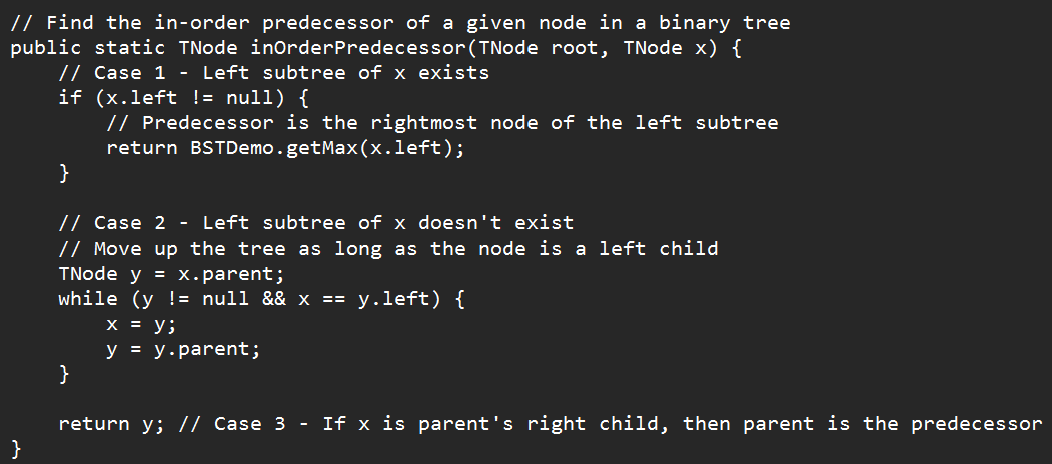

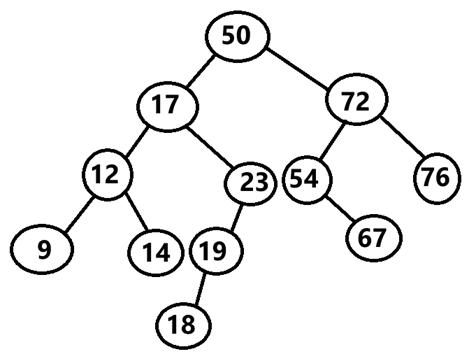

## Explanation of the outputs

#### find predecessor(17): [Case01]
- Left sub-tree exists
- Get the rightmost node (max value) of the left subtree.
- **Answer:** 14

#### find predecessor(23): [Case01]
- Left sub-tree exists
- Get the rightmost node (max value) of the left subtree.
- **Answer:** 19

#### find predecessor(19): [Case01]
- Left sub-tree exists
- Get the rightmost node (max value) of the left subtree.
- **Answer:** 18

#### find predecessor(76): [Case03]
- Left sub-tree does not exist
- right child of parent--Then, predecessor is the parent of 76 which is 72.
- **Answer:** 72


#### find predecessor(9): [Case02]
- Left sub-tree does not exist
- LOOP: left child of its parent--Then, start going to the parent as long as its the left child  or y becomes Null.
- Here, x = current node, y=predecessor
   - Step01:  x(current)=9, y(predecessor)=12
   - Step02:  x(current)=12, y(predecessor)=17
   - Step03:  x(current)=17, y(predecessor)=50
   - Step04:  x(current)=50, y(predecessor)=None (y==None, loop will end)
- **Answer:**  None


# Deletion in BST

#### Case01
**If No Children (Leaf Node):**
* If the node is a leaf node, simply remove it.

![SegmentLocal](https://i.giphy.com/media/ZcLLXw3CXlqGrFVtRi/giphy.gif "segment")

#### Case02
**If Only One Children/Subtree exists:**
* If the node has only one child, replace the node with its child directly.

* First removing 7 (had a child 3), then removing 13 (had a child 15)

```
Like removing a node from the middle of a linkedlist
```
![SegmentLocal](https://i.giphy.com/media/YrZ18grMiPQ6J2QWhP/giphy.gif "segment")

#### Case03

### Deleting a Node with Two Children in a Binary Search Tree (BST)

1. **Locate the Node to Delete:**
   - Search for the node with the specified value in the BST.
   - If the node is not found, no action is needed.

2. **Find its InOrder Successor or InOrder Predecessor**

3. **Replace the Node's Value:**
   - Replace the value of the node to be deleted with the value of its successor or predecessor.

4. **Recursively Delete the Duplicate Node:**
   - Delete the successor or predecessor node from its original position in the subtree.


![SegmentLocal](https://i.giphy.com/media/S78Dap8pBddwvipsNi/giphy.gif "segment")

In [9]:
def delete_with_successor(root, key):
    if root is None:
        return root  # Base case: Tree is empty or node not found

    # Traverse to the left subtree if key is smaller
    if key < root.val:
        root.left = delete_with_successor(root.left, key)

    # Traverse to the right subtree if key is larger
    elif key > root.val:
        root.right = delete_with_successor(root.right, key)

    else:
        # ==== Case 1 | No subtree or children ====
        if root.left is None and root.right is None:
            return None  # Simply delete the node

        # ==== Case 2 | One subtree (one child) ====
        elif root.left is None:
            # Only right child exists
            root.right.parent = root.parent  # Connect child to parent
            return root.right
        elif root.right is None:
            # Only left child exists
            root.left.parent = root.parent  # Connect child to parent
            return root.left

        # ==== Case 3 | Two subtrees (two children) ====
        else:
            # Find in-order successor (leftmost node in right subtree)
            succ = get_min(root.right)
            root.val = succ.val  # Replace value with successor's value
            # Delete the in-order successor node recursively
            root.right = delete_with_successor(root.right, succ.val)

    return root

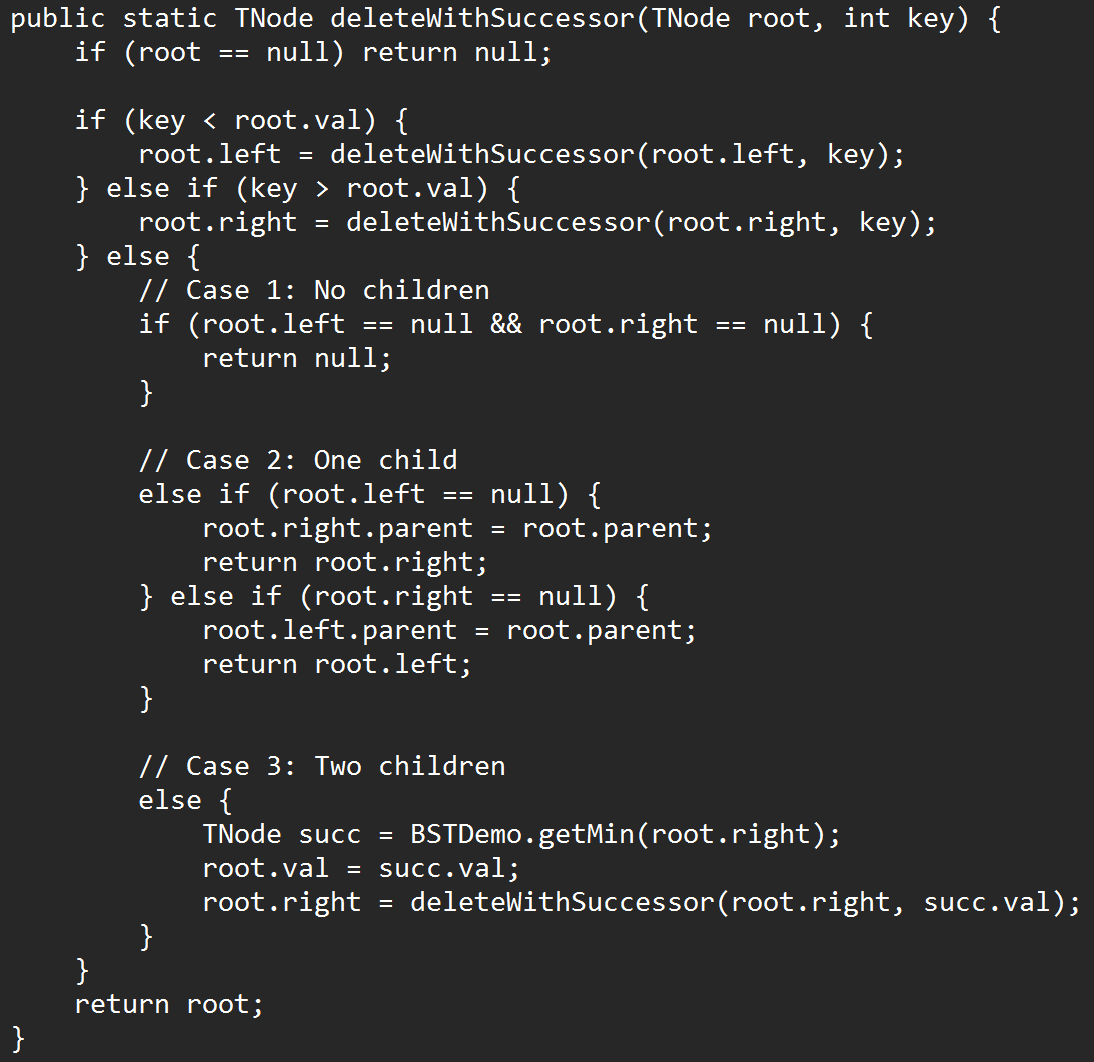

In [10]:
# --- Reset Tree Helper ---
def reset_tree():
    """
             50
            /  \
          30    70
         / \    / \
        20  40  60  80
    """
    root = None
    for val in [50, 30, 70, 20, 40, 60, 80]:
        root = insert(root, val)
    return root


root = reset_tree()

# Case 1: Delete leaf node (20)
print("=== Case 1: Delete Leaf Node (20) ===")
print("Before Deletion:")
inorder_traversal(root)
print("\nAfter Deletion:")
root = delete_with_successor(root, 20)
inorder_traversal(root)
print("\n")

# Case 2: Delete node with one child (30)
print("=== Case 2: Delete Node with One Child (30) ===")
"""
         50
        /  \
      30    70
     / \    / \
    N  40  60  80
    """
print("Before Deletion:")
inorder_traversal(root)
print("\nAfter Deletion:")
root = delete_with_successor(root, 30)
inorder_traversal(root)
print("\n")

# Case 3: Delete node with two children (50)
"""
         50
        /  \
      40    70
     / \    / \
    N  N  60  80
    """
print("=== Case 3: Delete Node with Two Children (70) ===")
print("Before Deletion:")
inorder_traversal(root)
print("\nAfter Deletion:")
root = delete_with_successor(root, 70)
inorder_traversal(root)
print()

# Case 1: Delete leaf node (80)
"""
         50
        /  \
      40    80
     / \    / \
    N  N  60   N
    """
print("=== Case 1: Delete Leaf Node (80) ===")
root = reset_tree()
print("Before Deletion:")
inorder_traversal(root)
print("\nAfter Deletion:")
root = delete_with_successor(root, 80)
inorder_traversal(root)

"""
         50
        /  \
      40    60
     / \    / \
    N  N  N   N
"""
print("\n")

=== Case 1: Delete Leaf Node (20) ===
Before Deletion:
20 30 40 50 60 70 80 
After Deletion:
30 40 50 60 70 80 

=== Case 2: Delete Node with One Child (30) ===
Before Deletion:
30 40 50 60 70 80 
After Deletion:
40 50 60 70 80 

=== Case 3: Delete Node with Two Children (70) ===
Before Deletion:
40 50 60 70 80 
After Deletion:
40 50 60 80 
=== Case 1: Delete Leaf Node (80) ===
Before Deletion:
20 30 40 50 60 70 80 
After Deletion:
20 30 40 50 60 70 



In [11]:
def delete_with_predecessor(root, key):
    if root is None:
        return root  # Base case: Tree is empty or node not found

    # Traverse to the left subtree if key is smaller
    if key < root.val:
        root.left = delete_with_predecessor(root.left, key)

    # Traverse to the right subtree if key is larger
    elif key > root.val:
        root.right = delete_with_predecessor(root.right, key)

    else:
        # ==== Case 1 | No subtree or children ====
        if root.left is None and root.right is None:
            return None  # Simply delete the node

        # ==== Case 2 | One subtree (one child) ====
        elif root.left is None:
            root.right.parent = root.parent
            return root.right
        elif root.right is None:
            root.left.parent = root.parent
            return root.left

        # ==== Case 3 | Two subtrees (two children) ====
        else:
            # Find in-order predecessor (rightmost node in left subtree)
            pred = get_max(root.left)
            root.val = pred.val  # Replace value with predecessor's value
            # Delete the in-order predecessor node recursively
            root.left = delete_with_predecessor(root.left, pred.val)

    return root

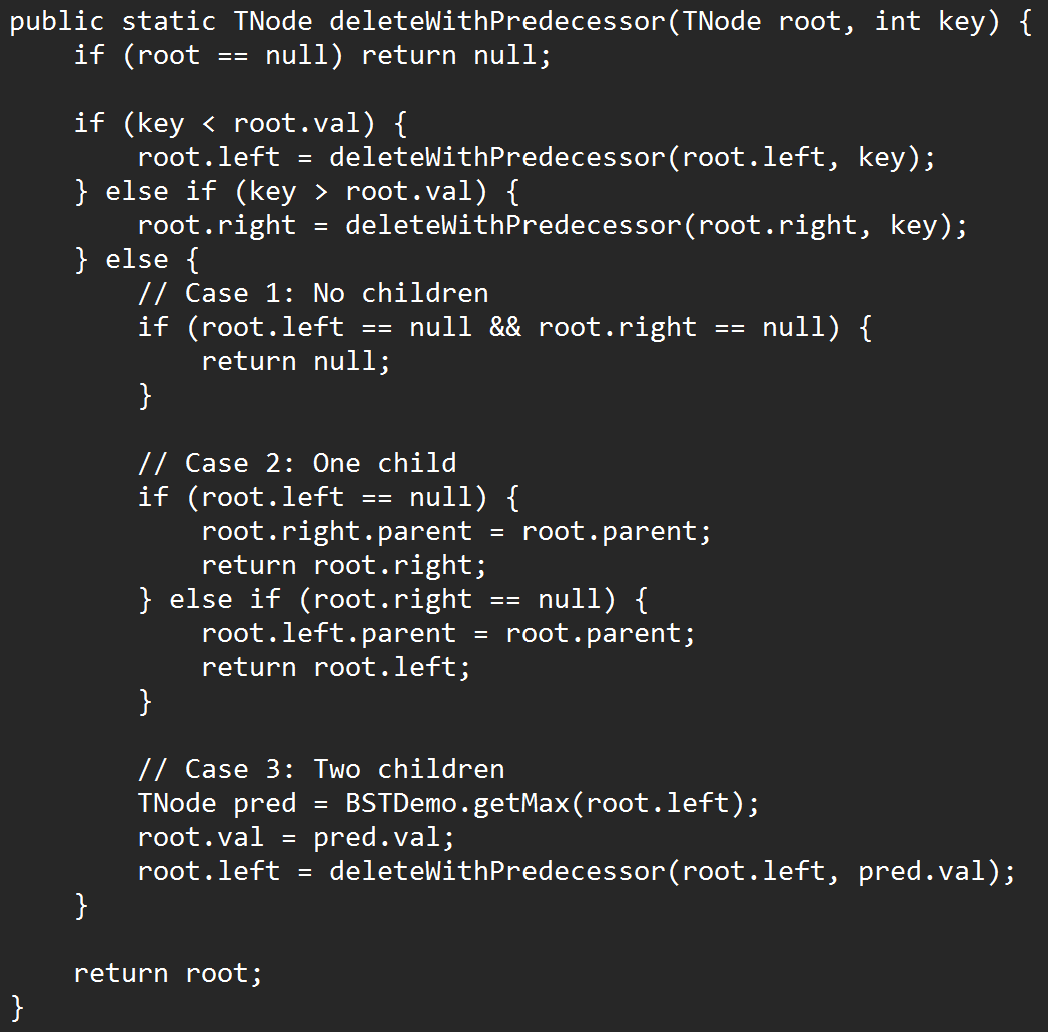

In [12]:

# --- Reset Tree Helper ---
def reset_tree():
    """
             50
            /  \
          30    70
         / \    / \
        20  40  60  80
    """
    root = None
    for val in [50, 30, 70, 20, 40, 60, 80]:
        root = insert(root, val)
    return root

root = reset_tree()

# Case 1: Delete leaf node (20)
print("=== Case 1: Delete Leaf Node (20) ===")
print("Before Deletion:")
inorder_traversal(root)
print("\nAfter Deletion:")
root = delete_with_predecessor(root, 20)
inorder_traversal(root)
print("\n")

# Case 2: Delete node with one child (30)
print("=== Case 2: Delete Node with One Child (30) ===")
"""
         50
        /  \
      30    70
     / \    / \
    N  40  60  80
"""
print("Before Deletion:")
inorder_traversal(root)
print("\nAfter Deletion:")
root = delete_with_predecessor(root, 30)
inorder_traversal(root)
print("\n")

# Case 3: Delete node with two children (70)
print("=== Case 3: Delete Node with Two Children (70) ===")
"""
         50
        /  \
      40    70
     / \    / \
    N  N0  60  80
"""
root = reset_tree()
print("Before Deletion:")
inorder_traversal(root)
print("\nAfter Deletion:")
root = delete_with_predecessor(root, 70)
inorder_traversal(root)
print()

"""
         50
        /  \
      40    60
     / \    / \
    N  N0  N  80
"""
print("=== Case 1: Delete Leaf Node (60) ===")
print("Before Deletion:")
inorder_traversal(root)
print("\nAfter Deletion:")
root = delete_with_predecessor(root, 60)
inorder_traversal(root)
"""
         50
        /  \
      40    80
     / \    / \
    N  N0  N   N
"""
print("\n")

=== Case 1: Delete Leaf Node (20) ===
Before Deletion:
20 30 40 50 60 70 80 
After Deletion:
30 40 50 60 70 80 

=== Case 2: Delete Node with One Child (30) ===
Before Deletion:
30 40 50 60 70 80 
After Deletion:
40 50 60 70 80 

=== Case 3: Delete Node with Two Children (70) ===
Before Deletion:
20 30 40 50 60 70 80 
After Deletion:
20 30 40 50 60 80 
=== Case 1: Delete Leaf Node (60) ===
Before Deletion:
20 30 40 50 60 80 
After Deletion:
20 30 40 50 80 



**I Highly Recommend playing with BSTs using the following websites:**

[Interactive BST simulation by University of San Francisco](https://www.cs.usfca.edu/~galles/visualization/BST.html) (Easy to understand)\
[Interactive BST Simulation by Visualgo.net](https://visualgo.net/en/bst) (Better UI and advanced stuff)